# Exploratory Data Analysis (EDA) of the Counterstrike: Global Offensive (CS:GO) Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
players_file = 'data/players.csv'
picks_file = 'data/picks.csv'
results_file = 'data/results.csv'
economy_file = 'data/economy.csv'


# Initial dataframes
players_df = pd.read_csv(players_file)
picks_df = pd.read_csv(picks_file)
results_df = pd.read_csv(results_file)
economy_df = pd.read_csv(economy_file)

C:\Users\guixu\AppData\Local\Temp\ipykernel_40384\4172851786.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  economy_df = pd.read_csv(economy_file)


## Initial inspection of results.csv:

In [4]:

# Get number of unique teams, matches, and events in the results_df
print('Number of unique matches:', results_df['match_id'].nunique())
print('Number of unique events:', results_df['event_id'].nunique())
# Get number of teams by finding the uniques across team_1 and team_2
unique_teams_count = pd.concat([results_df['team_1'], results_df['team_2']]).nunique()
print('Number of unique teams:', unique_teams_count)

# Total number of matches
print('Total number of matches:', results_df.shape[0])

results_df.describe()
results_df.head()

Number of unique matches: 27245
Number of unique events: 2363
Number of unique teams: 1554
Total number of matches: 45773


,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


`results.csv` contains the results of the individual matches. It is structured as a list of matches that deal with the following columns:

- `date` is the date of the match in the format YYYY-MM-DD
- `team_1` and `team_2` are the names of the two teams that played the match.
- `_map` is the map where the match took place.
- `map_winner` is the team that won the map (categorical 1 or 2 represents the team)
- `starting_ct` is the team that started as CTs. 
- `ct_1` and `ct_2` are the scores of the two teams as CTs.
- `t_1` and `t_2` are the scores of the two teams as Ts.
- `result_1` and `result_2` are the scores of the two teams in the match (sum of CT and T scores for each team).
- `event_id` is the id of the event where the match took place.
- `match_id` is the id of the match itself.
- `rank_1` and `rank_2` are the ranks of the two teams that played the match.
- `map_wins_1` and `map_wins_2` are the number of maps won by each of the two teams.
- `match_winner` is the team that won the match.

The dataset also seems to be clean, with no missing values.

The dataset describes the results of **27'245** matches across **2'363** events where **1554** teams participated.

*Note: Please refer to the milestone 1 document in case you need context on the functioning of the game*

Max date: 2020-03-18 00:00:00
Min date: 2015-11-03 00:00:00


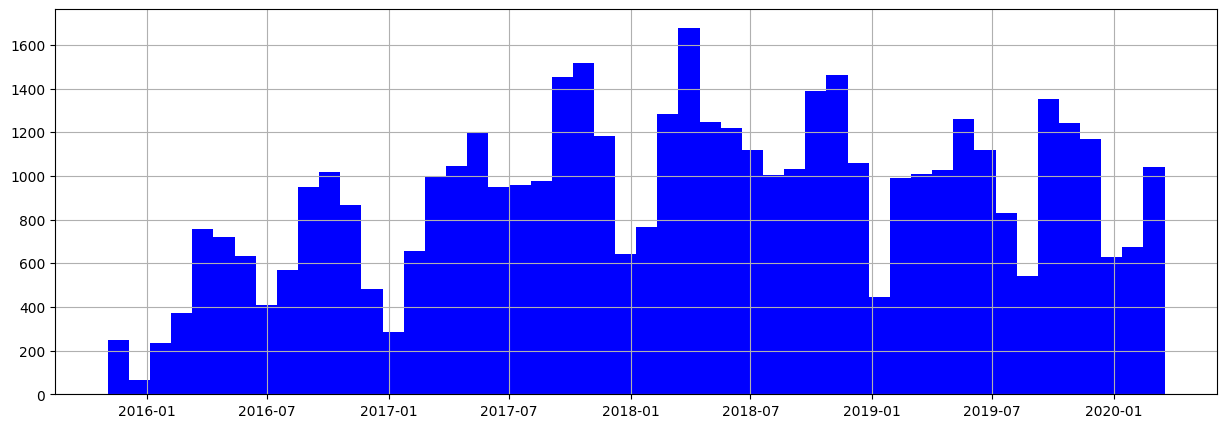

In [5]:
# Get the distribution of the dates and make a histogram
results_df['date'] = pd.to_datetime(results_df['date'])
results_df['date'].hist(figsize=(15,5), bins=50, color='blue')

# Print max and min
print('Max date:', results_df['date'].max())
print('Min date:', results_df['date'].min())

This data set tackles with data from matches starting from 2015-11-03 to 2020-03-18

Distribution of the number of times a team has played:
Liquid             1004
Virtus.pro         1000
Tricked             970
mousesports         947
G2                  923
                   ... 
RRQ                   1
Paranoia              1
Itakera Classic       1
Novacancy             1
neXtPlease!           1
Name: count, Length: 1554, dtype: int64


<Axes: >

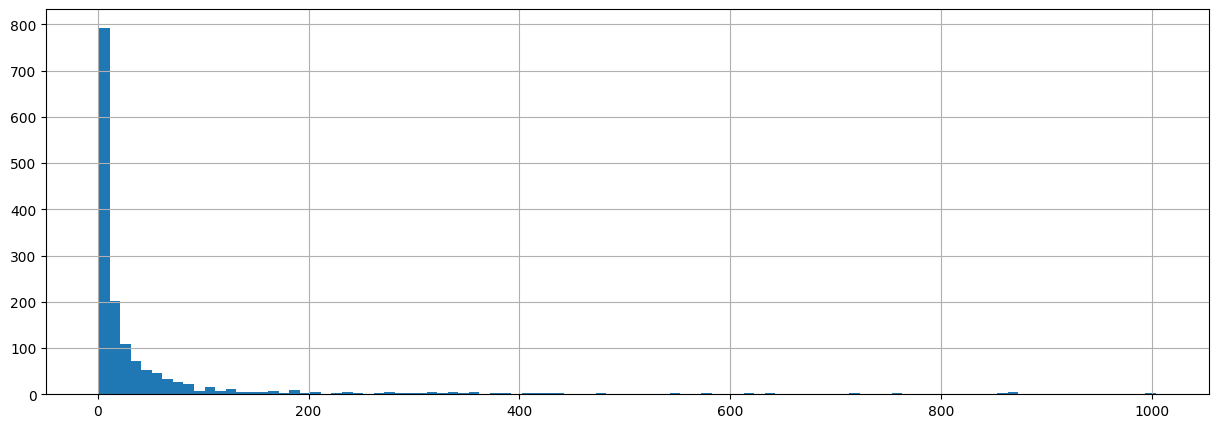

In [6]:
# Get the distribution of the number of times a team has played by concatenating team_1 and team_2 and using value_counts
team_counts = pd.concat([results_df['team_1'], results_df['team_2']]).value_counts()
print('Distribution of the number of times a team has played:')
print(team_counts)
# Histogram of the distribution of the number of times a team has played (big width of the plot)
team_counts.hist(bins=100, figsize=(15, 5))

The above plot shows that most of the teams played a small number of games, while some outlier teams played a large number of games (over 1000 in the case of **Liquid**).

<Axes: >

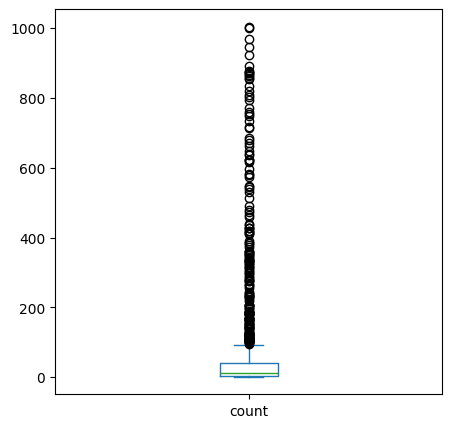

In [7]:
# Boxplot of the distribution of the number of times a team has played 
team_counts.plot(kind='box', figsize=(5, 5))

The above boxplot shows the same thing: the number of games played by a team has a mean closer to 0. The boxplot also shows that there are a few teams that played a large number of games. 

## Initial inspection of picks.csv:

In [8]:
picks_df.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2


is a binary indicator (0 or 1) showing whether the team positions were swapped.
- `date`: the date of the match in the format YYYY-MM-DD
- `team_1` and `team_2`: the names of the two teams that picked
- `inverted_teams`: a binary indicator (0 or 1) - Value equal to 0 if the teams are in the same order in the HLTV website. Value equal to 1 if Team 1 and Team 2 changed orders from the website
- `match_id`: the id of the match itself
- `event_id`: the id of the event where the match took place
- `best_of`: the number of maps in the match
- `system`: Digits ranging from 1 to 5 - (1) map vetoed by Team 1, (2) map vetoed by Team 2, (3) map picked by Team 1, (4) map picked by Team 2, (5) map chosen by the process of elimination (last map available) this is the digit 5 is omitted from the sequence
- `t1_removed_1` and `t2_removed_1`: the first map removed by each team
- `t1_removed_2` and `t2_removed_2`: the second map removed by each team
- ... same concept for the other similar columns
- `t1_picked_1` and `t2_picked_1`: the first map picked by each team
- `left_over`: the last map available by process of elimination


Distribution of the best_of column:
best_of
3            10142
1             5656
2              224
3.               3
of               3
3(LAN)           3
1(Online)        2
2(Online)        1
3(Online)        1
Name: count, dtype: int64


<Axes: ylabel='count'>

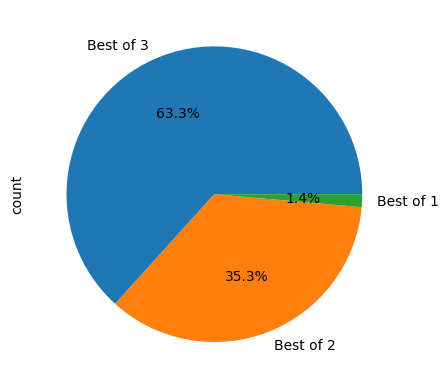

In [9]:
# Get the distribution of the best_of column
best_of_counts = picks_df['best_of'].value_counts()
print('Distribution of the best_of column:')
print(best_of_counts)

# Include only the rows where the best_of column is 1, 2 or 3 as strings
filtered_best_of = picks_df[picks_df['best_of'].isin(['1', '2', '3'])]
# pie chart of best_of column distribution
filtered_best_of['best_of'].value_counts().plot(kind='pie', labels=['Best of 3', 'Best of 2', 'Best of 1'], autopct='%1.1f%%')

Most of the games were played as a best of 3, meaning three maps per match, these types of matches represent about **63.3%**. The second most common type of match was the best of 2 at **35.3%**, while best of 1 matches were the least common by far at **1.4%**.

*Some rows were filtered out (13) because they contained text in addition to the number of games. This should not affect the overall impression of the data.*

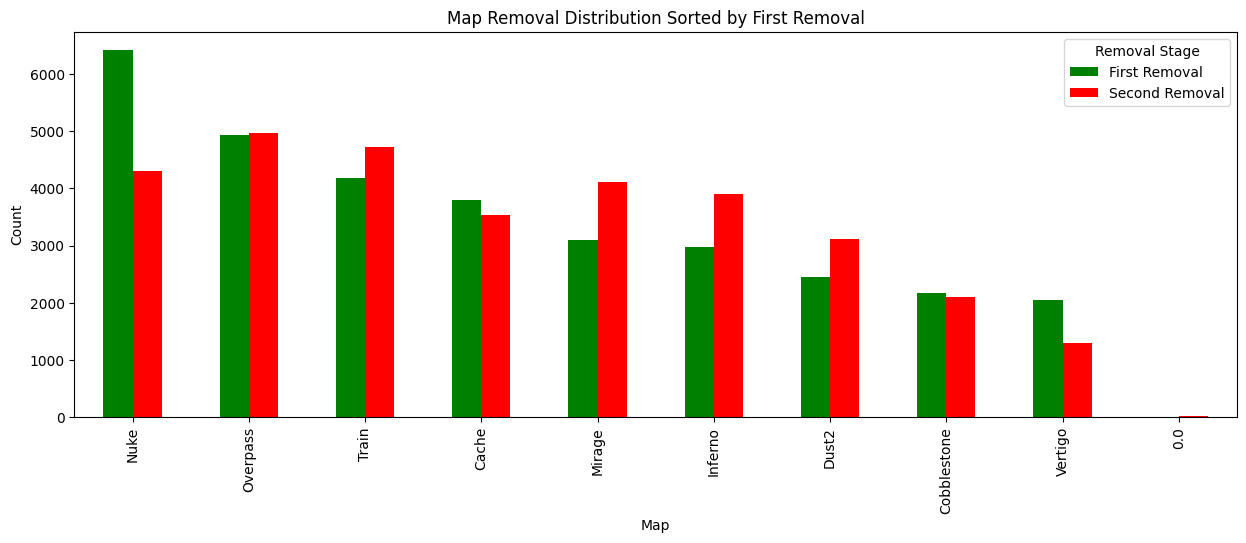

In [10]:
# Assuming picks_df is your DataFrame
first_removal = pd.concat([picks_df['t1_removed_1'], picks_df['t2_removed_1']]).value_counts()
second_removal = pd.concat([picks_df['t1_removed_2'], picks_df['t2_removed_2']]).value_counts()

# Create a combined DataFrame
combined_removals = pd.DataFrame({'First Removal': first_removal, 'Second Removal': second_removal})

# Sort the DataFrame by 'First Removal'
combined_removals = combined_removals.sort_values(by='First Removal', ascending=False)

# Plot
ax = combined_removals.plot(kind='bar', color=['green', 'red'], figsize=(15, 5))
ax.set_title('Map Removal Distribution Sorted by First Removal')
ax.set_xlabel('Map')
ax.set_ylabel('Count')
plt.legend(title='Removal Stage')
plt.show()


It seems that the map that is rejected most first is **Nuke**, followed by **Overpass**, followed by **Train**.

The map that is rejected most second is **Overpass**, followed by **Train**, followed by **Nuke**. So the rejections seem to follow the same pattern as the first rejections.

Now let's see which maps are picked first

<Axes: >

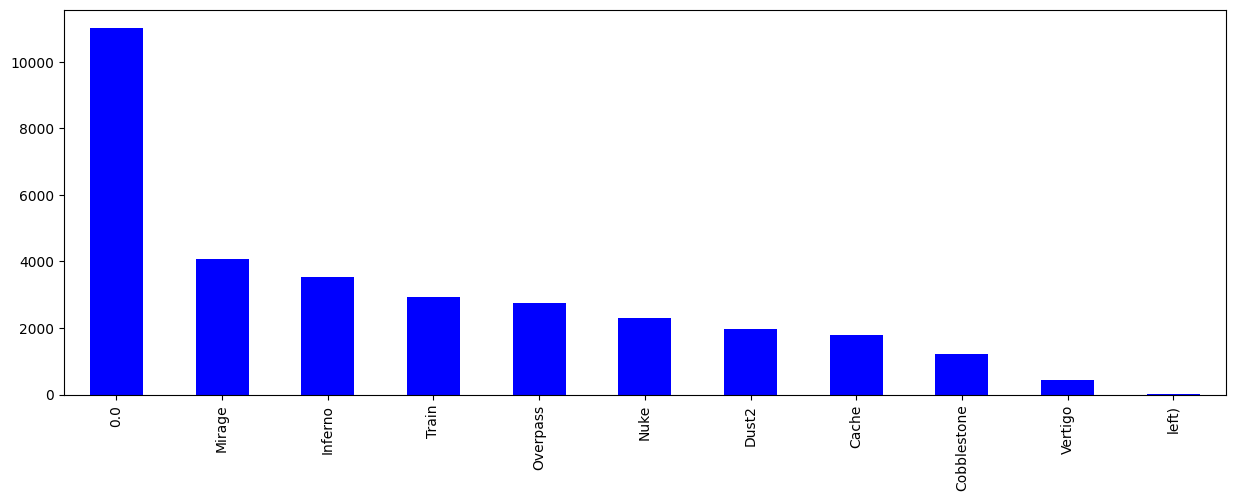

In [11]:
first_pick = pd.concat([picks_df['t1_picked_1'], picks_df['t2_picked_1']]).value_counts()

# Bar plot
first_pick.plot(kind='bar', color='blue', figsize=(15, 5))

## Initial Inspection of economy.csv:

In [12]:
economy_df.head()

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset has the standard:
- `date`: the date of the match in the format YYYY-MM-DD
- `match_id`: the id of the match itself
- `event_id`: the id of the event where the match took place
- `team_1` and `team_2`: the names of the two teams that played the match
- `best_of`: max number of maps to be played in the match to decide its outcome
- `_map`: the map where the match took place
- `t1_start` and `t2_start`: Team 1 or 2 starts on the first half of the map ("t" or "ct")
- `1_t1`, ...: team 1 equipment value in round 1, 2, 3, ...
- `1_winner`, ...: the team that won the round 1, 2, 3, ... (Contains N/A for rounds that weren't played because the game ended before the round was played)

## Initial Inspection of players.csv

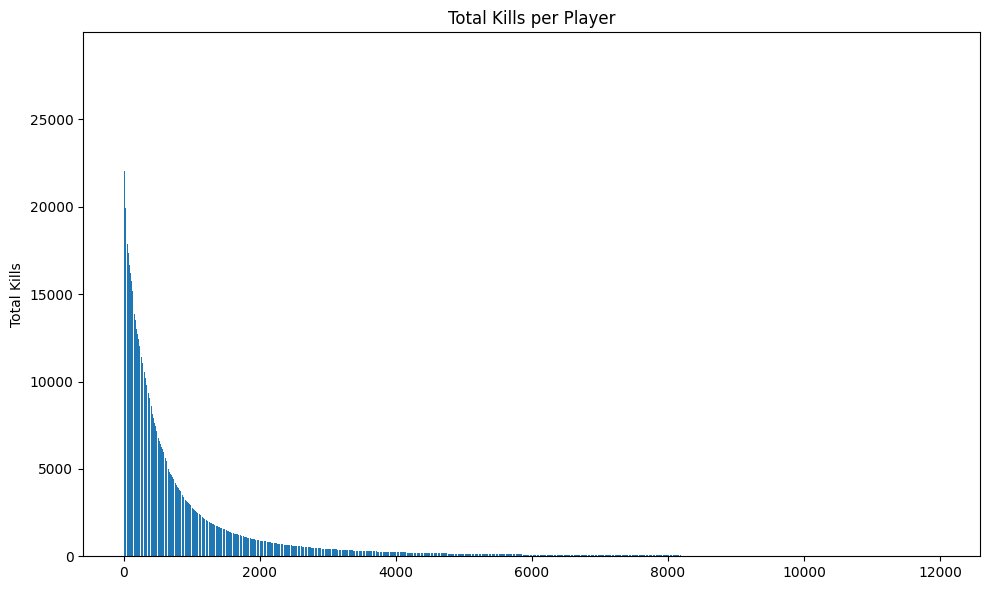

In [14]:
# Group the dataframe by the player's name and calculate each player's total kills
players_re = players_df.groupby('player_name')['kills'].sum()
# sort the kill counts from high to low
players_kill_most = players_re.sort_values(ascending=False)
players_kill_most = players_kill_most.reset_index()

# plot the bar figure
plt.figure(figsize=(10, 6))
plt.bar(players_kill_most.index, players_kill_most['kills'])
plt.title('Total Kills per Player')
plt.ylabel('Total Kills')

# show the figure
plt.tight_layout()
plt.show()

This figure shows the total kills of each player across all matches they participated in during this period from highest to lowest. 

The difference in kill counts between players is significant. 

It can be observed that after the first two thousand players, the total kill count of all players drops far below the sum of the kill counts of the top two thousand players.


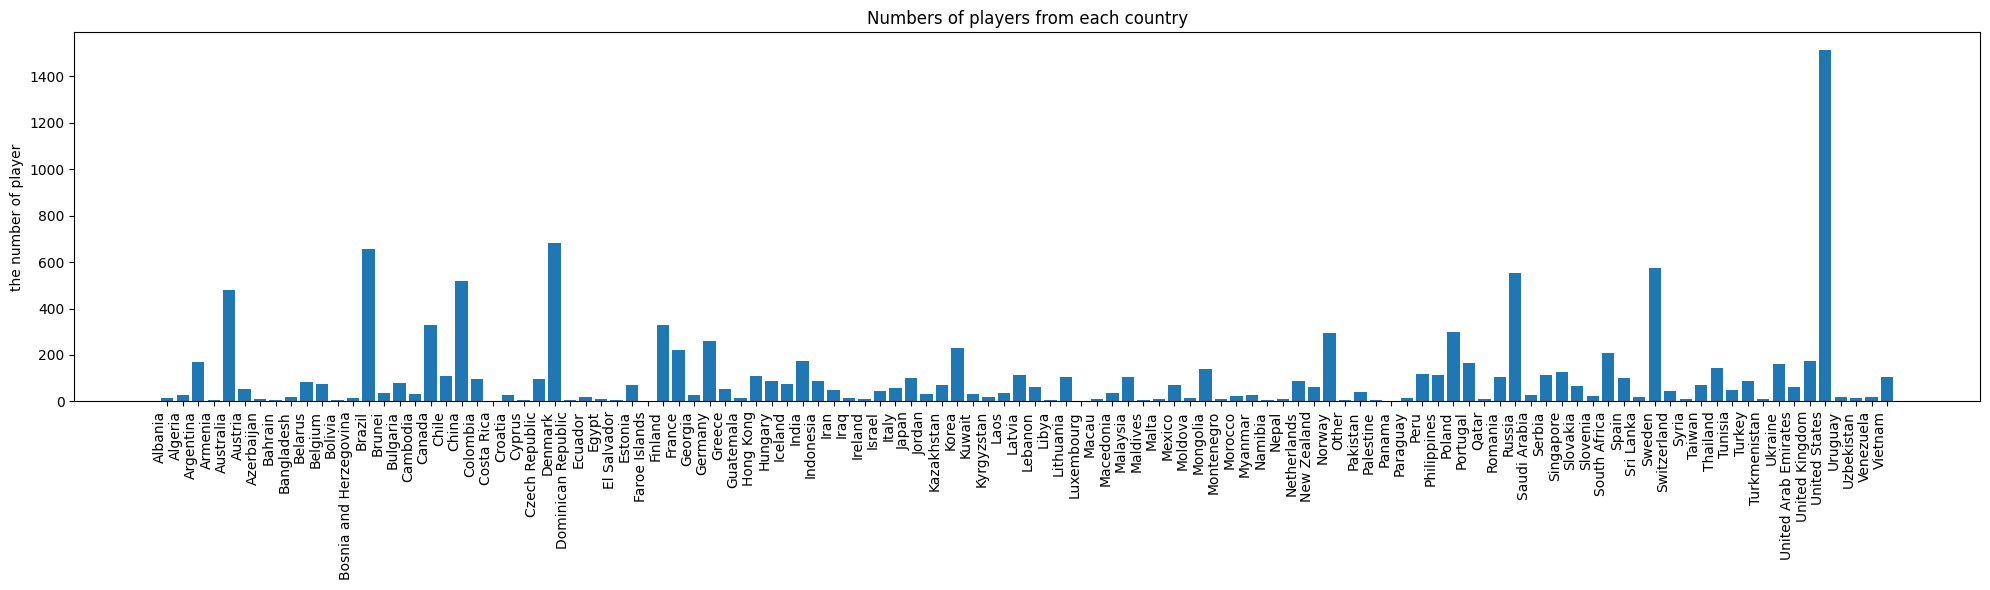

In [15]:
# Group the dataframe by the player's nationality
players_co = players_df.groupby('country')['player_name'].nunique()
players_co = players_co.reset_index()
# plot the figure
plt.figure(figsize=(20, 6))
plt.bar(players_co['country'], players_co['player_name'])
plt.title('Numbers of players from each country')
plt.ylabel('the number of player')
plt.xticks(rotation=90, ha='right')

# show the figure
plt.tight_layout()
plt.show()

From the figure, we can see that The United States has the most players which is 1514 players, far more than the second place Denmark.